In [60]:
import numpy as np
import os
import librosa
import librosa.feature
import librosa.display
import sounddevice
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
%matplotlib inline

## Filtering a song to extract the right features

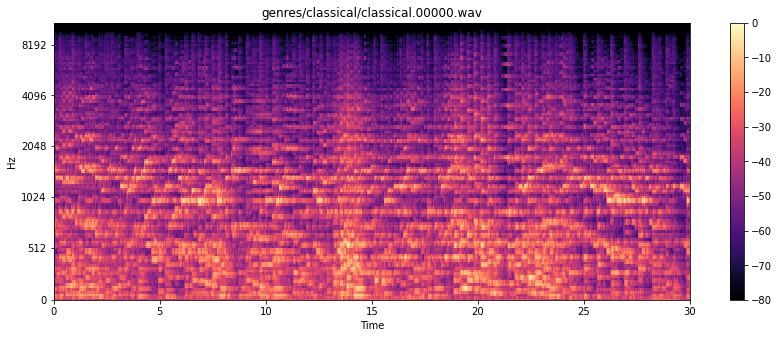

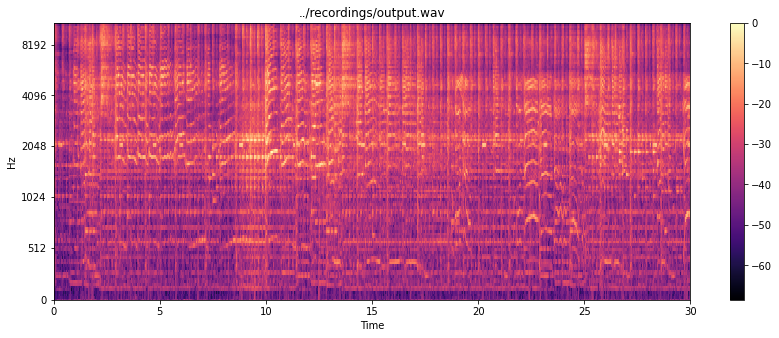

In [86]:
def display_feature(song):
    y, sr = librosa.load(song)
    
    # filter here
    
    #mfcc = librosa.feature.mfcc(y)
    spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
    spect = librosa.power_to_db(spect, ref=np.max)
    
    plt.figure(figsize=(12,4.8))
    librosa.display.specshow(spect, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title(song)
    plt.tight_layout()
    #plt.show()
    
display_feature(some_audio)
display_feature(recorded_audio)

In [87]:
# get a song
test_genre = "classical"
some_audio = "genres/" + test_genre + "/" + test_genre + ".00000.wav"
recorded_audio = "../recordings/output.wav"

data, samplerate = librosa.load(some_audio)

In [57]:
lowcut = 10.0
highcut = 8000.0
FRAME_RATE = samplerate

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def bandpass_filter(buffer):
    return butter_bandpass_filter(buffer, lowcut, highcut, FRAME_RATE, order=6)

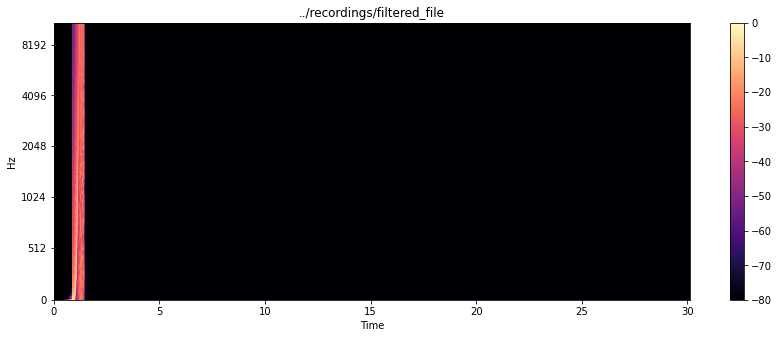

In [58]:
filtered = np.apply_along_axis(bandpass_filter, 0, data).astype('int16')
wavfile.write(os.path.join("../recordings", 'filtered_file'), samplerate, filtered)
display_feature("../recordings/filtered_file")

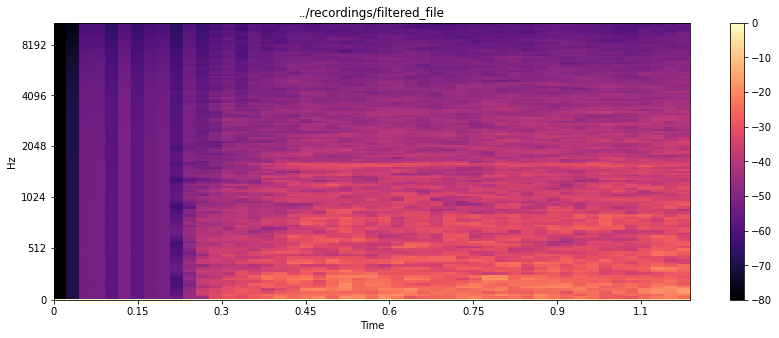

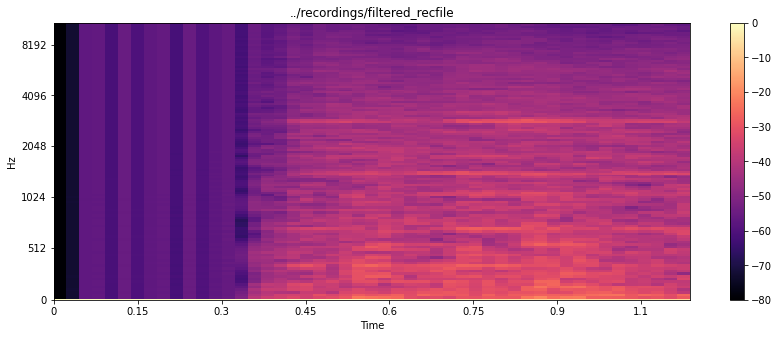

In [88]:
def filter_f(file):
    lo, hi = 400,2800
    y, sr = librosa.load(file)
    b, a = butter(N=6, Wn=[2*lo/sr, 2*hi/sr], btype='band')
    x = lfilter(b,a,y)
    return x

def extract_song_features(f):
    y, sr = librosa.load(f)
    y = filter_f(f)

    # get Mel-frequency cepstral coefficients and normalize
    #mfcc = librosa.feature.mfcc(y)
    #mfcc /= np.amax(np.absolute(mfcc))
    spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
    spect = librosa.power_to_db(spect, ref=np.max)
    spect /= np.amax(np.absolute(spect))
    return np.ndarray.flatten(spect)[:25000]

#sounddevice.play(x, sr)
filtered = extract_song_features(some_audio)#filter_f(some_audio)
filtered_rec = extract_song_features(recorded_audio)#filter_f(recorded_audio)
wavfile.write(os.path.join("../recordings", 'filtered_file'), samplerate, filtered)
wavfile.write(os.path.join("../recordings", 'filtered_recfile'), samplerate, filtered_rec)
display_feature("../recordings/filtered_file")
display_feature("../recordings/filtered_recfile")